Task 1: 

Installing relevant packages 

In [199]:
pip install mne mne-bids pandas numpy matplotlib pybv

Note: you may need to restart the kernel to use updated packages.


In [200]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import mne  
import mne_bids  
from utils import resample, smooth_signal

Specifying the subjects directory and metadata information

In [201]:
bids_dir=r'/home/inesh_roy/Cogsci_Task/ds003688'
subjects = mne_bids.get_entity_vals(bids_dir, 'subject')

subject = '09'
acquisition = 'clinical'
task = 'film'
run = '2'
datatype = 'ieeg'
session = 'iemu'

Loading the channels for subject 5 by accessing the channels tsv file

In [202]:
channels_path = mne_bids.BIDSPath(subject=subject,
                                    session=session,
                                    suffix='channels',
                                    extension='tsv',
                                    datatype=datatype,
                                    task=task,
                                    acquisition=acquisition,
                                    run = '2',
                                    root=bids_dir)
channels = pd.read_csv(str(channels_path.match()[0]), sep='\t', header=0, index_col=None)

Accessing the ieeg.vhdr file which acts as a header file to analyze the ieeg file which includes necessary voltage data for all channels in subject 5

In [203]:
data_path = mne_bids.BIDSPath(subject=subject,
                                    session=session,
                                    suffix='ieeg',
                                    extension='vhdr',
                                    datatype=datatype,
                                    task=task,
                                    acquisition=acquisition,
                                    root=bids_dir)
raw = mne.io.read_raw_brainvision(str(data_path.match()[0]), scale=1.0, preload=False, verbose=True)
raw.set_channel_types({ch_name: str(x).lower()
                if str(x).lower() in ['ecog', 'seeg', 'eeg'] else 'misc'
                                for ch_name, x in zip(raw.ch_names, channels['type'].values)})
raw.drop_channels([raw.ch_names[i] for i, j in enumerate(raw.get_channel_types()) if j == 'misc'])

Extracting parameters from /home/inesh_roy/Cogsci_Task/ds003688/sub-09/ses-iemu/ieeg/sub-09_ses-iemu_task-film_acq-clinical_run-2_ieeg.vhdr...
Setting channel info structure...


/tmp/ipykernel_37153/2865297635.py:10: RuntimeWarning: The unit for channel(s) EMG+, MKR1+, MKR2+, ORB+, ah+, ecg+ has changed from V to NA.
  raw.set_channel_types({ch_name: str(x).lower()


<RawBrainVision | sub-09_ses-iemu_task-film_acq-clinical_run-2_ieeg.eeg, 69 x 856883 (418.4 s), ~60 KiB, data not loaded>

Generating a list to confirm if all misc electrodes have been discarded. And that 

In [204]:

print("Channel Map:", list(zip(raw.ch_names, raw.get_channel_types()))[:102]) #makes tuples (Channel Name, Channel Type)

data_slice = raw.get_data()[0:5, :20]
print("\nFirst 20 Samples for first 5 Channels\n")
print(data_slice)

Channel Map: [('AL1', 'seeg'), ('AL2', 'seeg'), ('AL3', 'seeg'), ('AL4', 'seeg'), ('AL5', 'seeg'), ('AL6', 'seeg'), ('AL7', 'seeg'), ('AL8', 'seeg'), ('AL9', 'seeg'), ('AL10', 'seeg'), ('AL11', 'seeg'), ('AL12', 'seeg'), ('AHL1', 'seeg'), ('AHL2', 'seeg'), ('AHL3', 'seeg'), ('AHL4', 'seeg'), ('AHL5', 'seeg'), ('AHL6', 'seeg'), ('AHL7', 'seeg'), ('AHL8', 'seeg'), ('AHL9', 'seeg'), ('AHL10', 'seeg'), ('APL1', 'seeg'), ('APL2', 'seeg'), ('APL3', 'seeg'), ('APL4', 'seeg'), ('APL5', 'seeg'), ('PHL1', 'seeg'), ('PHL2', 'seeg'), ('PHL3', 'seeg'), ('PHL4', 'seeg'), ('PHL5', 'seeg'), ('PHL6', 'seeg'), ('PHL7', 'seeg'), ('PHL8', 'seeg'), ('PHL9', 'seeg'), ('PHL10', 'seeg'), ('PPL1', 'seeg'), ('PPL2', 'seeg'), ('PPL3', 'seeg'), ('PPL4', 'seeg'), ('PPL5', 'seeg'), ('PPL6', 'seeg'), ('PPL7', 'seeg'), ('PPL8', 'seeg'), ('PPL9', 'seeg'), ('PPL10', 'seeg'), ('MPL1', 'seeg'), ('MPL2', 'seeg'), ('MPL3', 'seeg'), ('MPL4', 'seeg'), ('MPL5', 'seeg'), ('MPL6', 'seeg'), ('MPL7', 'seeg'), ('MPL8', 'seeg'), ('


First 20 Samples for first 5 Channels

[[-1.78906250e-04 -1.76464844e-04 -1.74804687e-04 -1.77832031e-04
  -1.80761719e-04 -1.80468750e-04 -1.81542969e-04 -1.83496094e-04
  -1.80664062e-04 -1.76367187e-04 -1.74902344e-04 -1.76855469e-04
  -1.81933594e-04 -1.86621094e-04 -1.88378906e-04 -1.86425781e-04
  -1.81835938e-04 -1.76171875e-04 -1.66113281e-04 -1.53710937e-04]
 [-1.48242187e-04 -1.47265625e-04 -1.45507812e-04 -1.47265625e-04
  -1.51171875e-04 -1.51757812e-04 -1.52441406e-04 -1.54003906e-04
  -1.50488281e-04 -1.47558594e-04 -1.46875000e-04 -1.45898438e-04
  -1.47460937e-04 -1.48339844e-04 -1.47460937e-04 -1.44238281e-04
  -1.37109375e-04 -1.30761719e-04 -1.19628906e-04 -1.06152344e-04]
 [-9.89257813e-05 -9.70703125e-05 -9.68750000e-05 -9.90234375e-05
  -1.01757813e-04 -1.03710937e-04 -1.02246094e-04 -9.95117187e-05
  -9.52148437e-05 -9.41406250e-05 -9.56054688e-05 -9.73632812e-05
  -1.00683594e-04 -1.03906250e-04 -1.04101563e-04 -1.01953125e-04
  -9.53125000e-05 -8.67187500e-05 

Plotting all 80 ECoG electrodes to detect Bad/Noisy Signals and to ensure if the data has been correctly loaded

Reading 0 ... 856882  =      0.000 ...   418.399 secs...


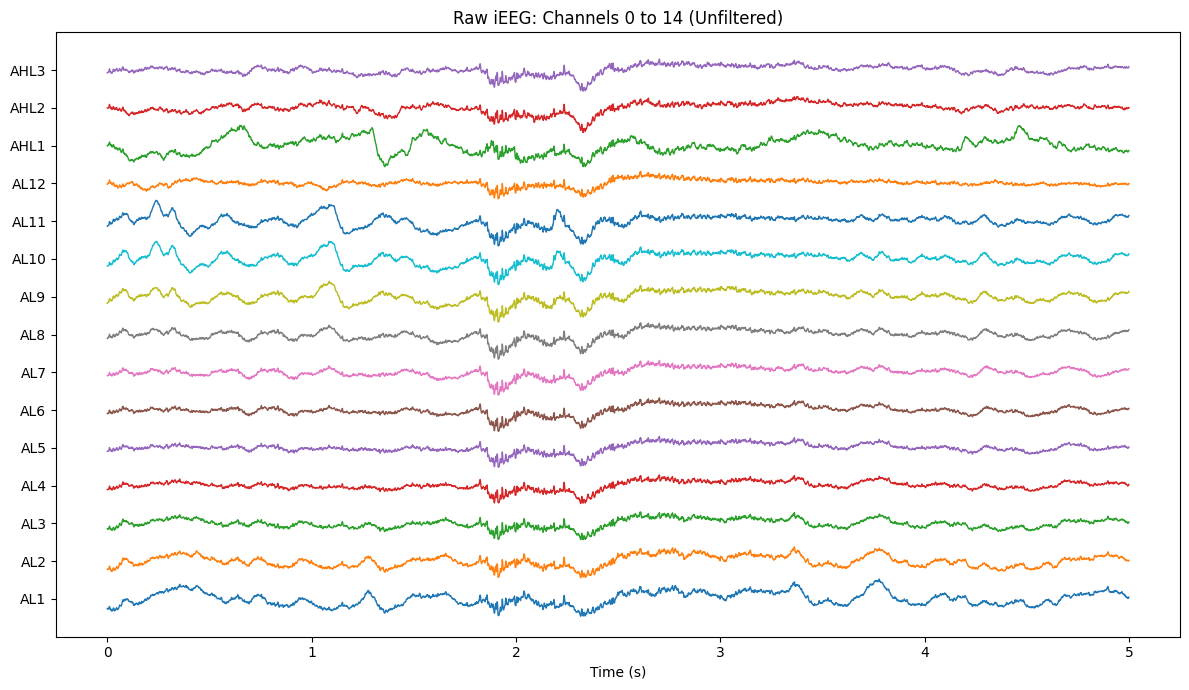

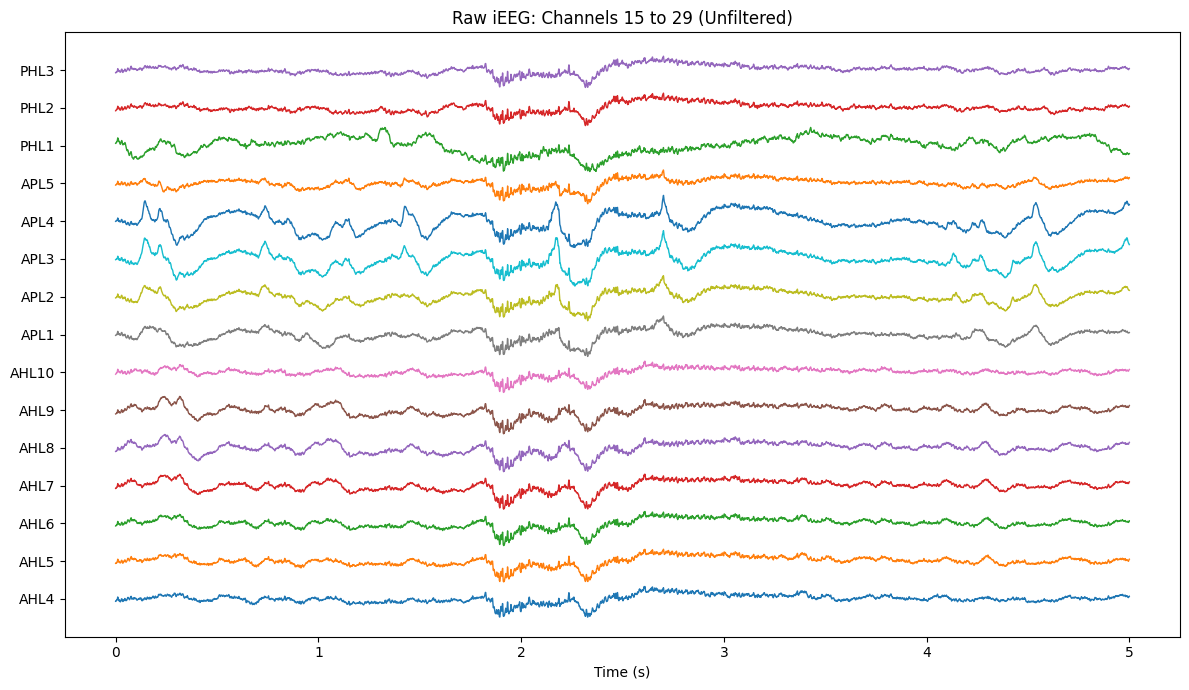

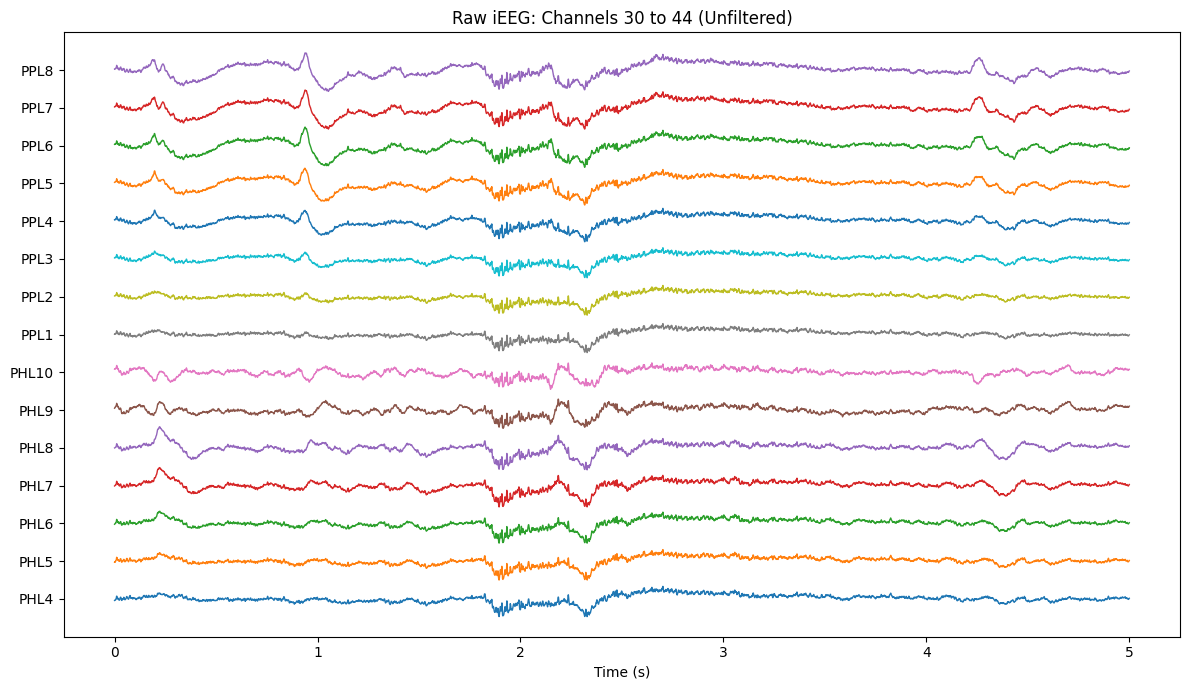

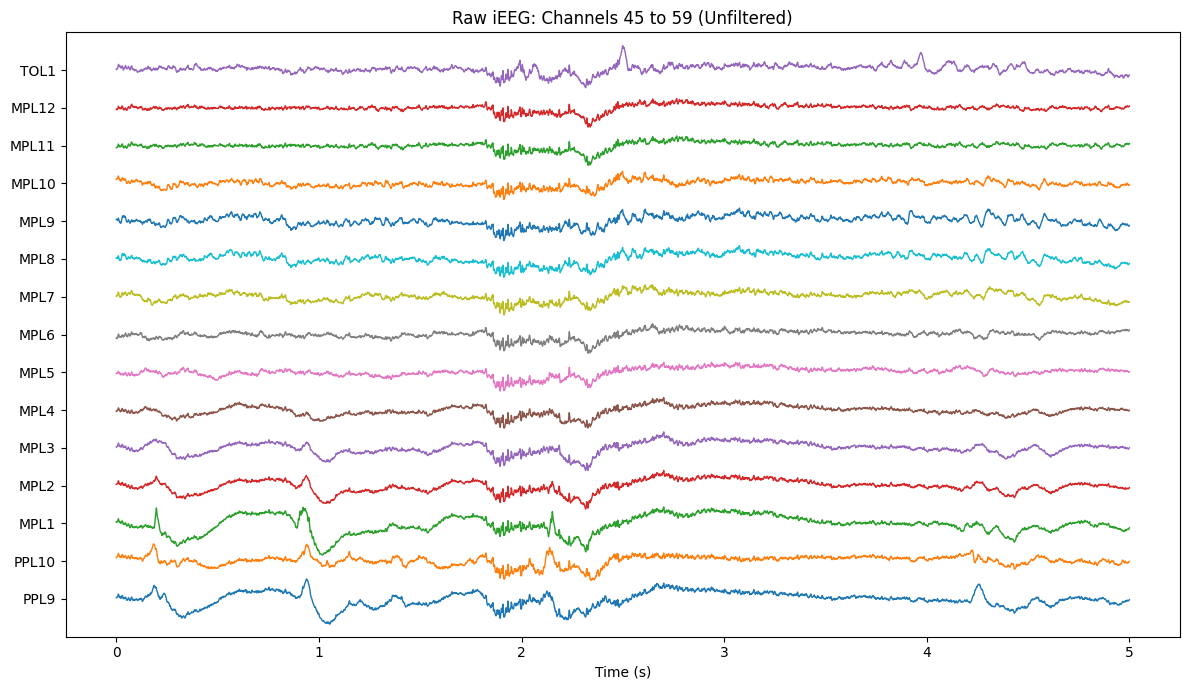

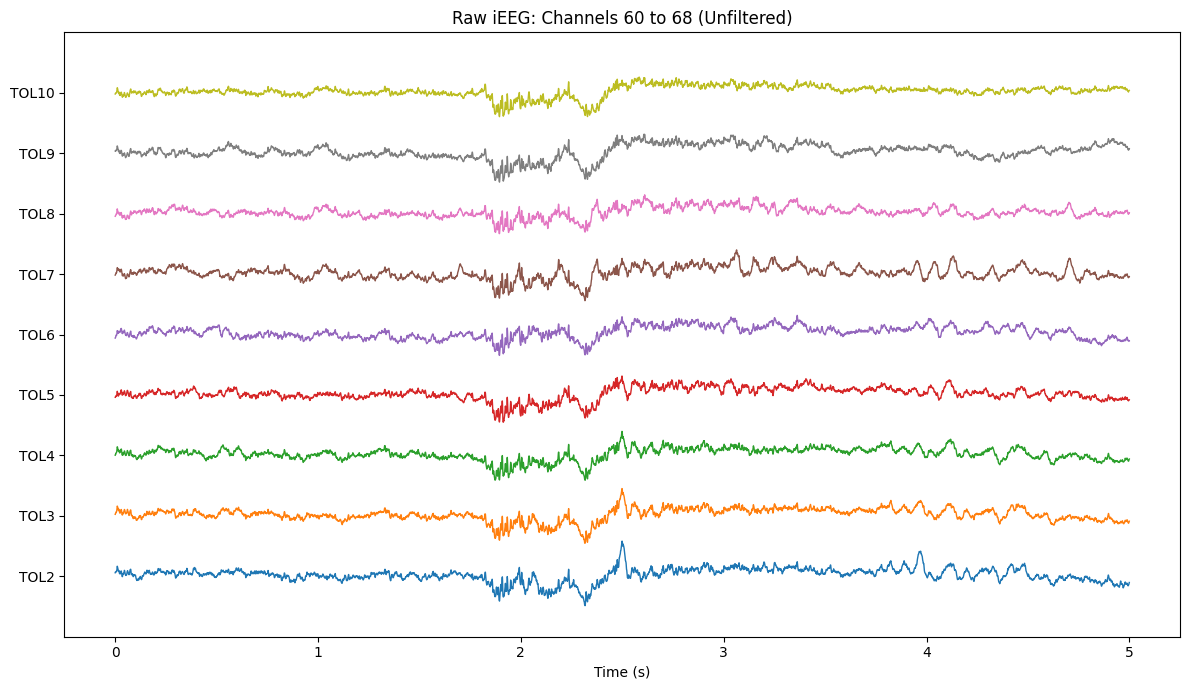

In [205]:

raw.load_data()
total_channels = len(raw.ch_names)
batch_size = 15
start_sec = 0
stop_sec = 5
offset = 0.0007  # Vertical spacing

#Looping through all channels
for start_ch in range(0, total_channels, batch_size):
    stop_ch = min(start_ch + batch_size, total_channels)
    n_channels_in_batch = stop_ch - start_ch
    
    data, times = raw[start_ch:stop_ch, int(start_sec * raw.info['sfreq']):int(stop_sec * raw.info['sfreq'])]
    
    # Creating necessary plots
    fig, ax = plt.subplots(figsize=(12, 7))
    
    for i in range(n_channels_in_batch):
        ax.plot(times, data[i] + (i * offset), linewidth=1)
    
    ax.set_yticks([i * offset for i in range(n_channels_in_batch)])
    ax.set_yticklabels(raw.ch_names[start_ch:stop_ch])
    ax.set_xlabel("Time (s)")
    ax.set_title(f"Raw iEEG: Channels {start_ch} to {stop_ch-1} (Unfiltered)")
    ax.set_ylim(-offset, n_channels_in_batch * offset)
    
    plt.tight_layout()
    plt.show()  

Generating the PSD of all channels at once to estimate which frequency range has most 

Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_37153/1878111500.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=255).plot()
/home/inesh_roy/Cogsci_Task/myenv/lib/python3.12/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


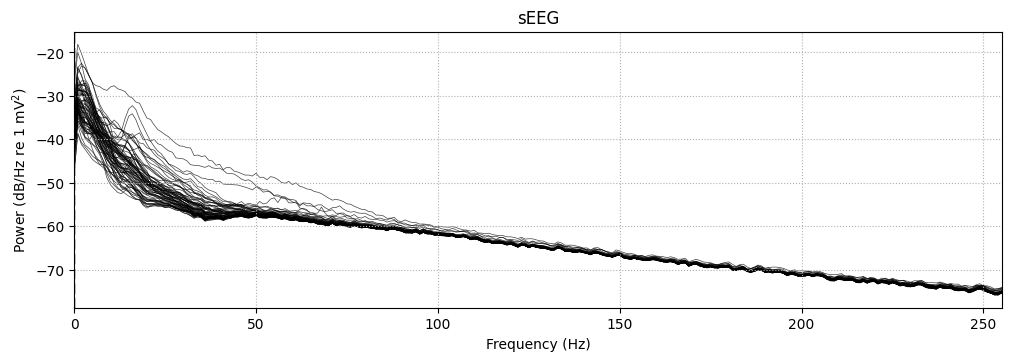

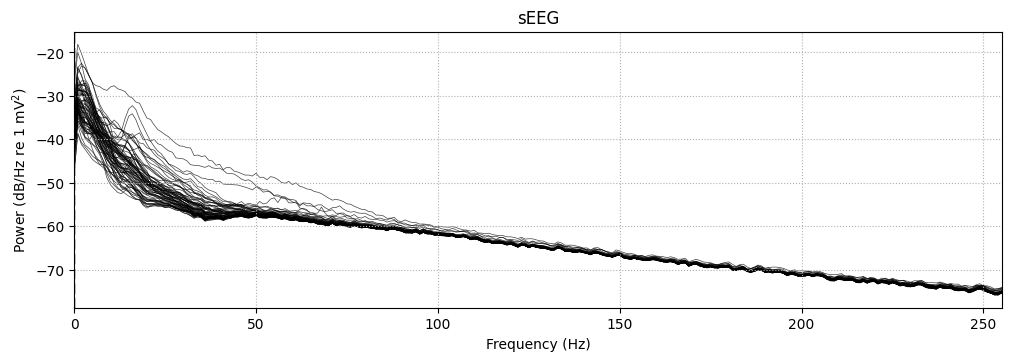

In [206]:
raw.compute_psd(fmax=255).plot()

The PSD plot shows huge variation in some channels, remaining channels follow a general trend of frequency power distribution. This is due to the noisy channels. Our first job is to remove these bad signals.

In [207]:
bad_channels = channels['name'][(channels['type'].isin(['ECOG', 'SEEG'])) & (channels['status'] == 'bad')].tolist()
raw.info['bads'].extend([ch for ch in bad_channels])
raw.drop_channels(raw.info['bads'])

<RawBrainVision | sub-09_ses-iemu_task-film_acq-clinical_run-2_ieeg.eeg, 69 x 856883 (418.4 s), ~451.1 MiB, data loaded>

Removed 7 bad ECoG signals. Recalculating PSD to notice changes

Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_37153/1878111500.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=255).plot()
/home/inesh_roy/Cogsci_Task/myenv/lib/python3.12/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


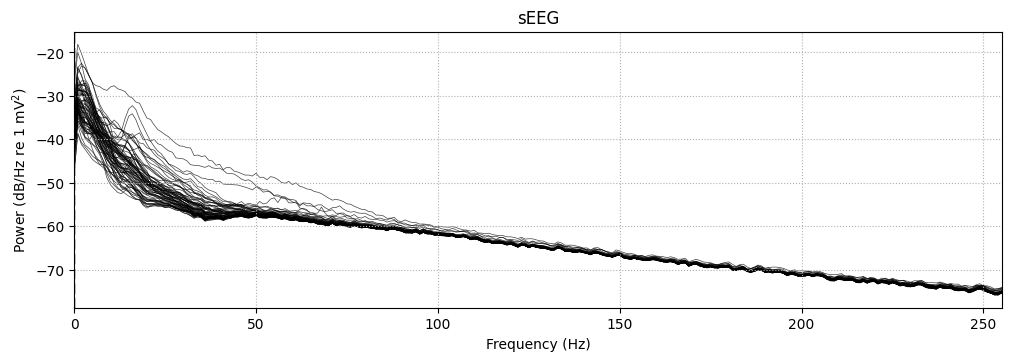

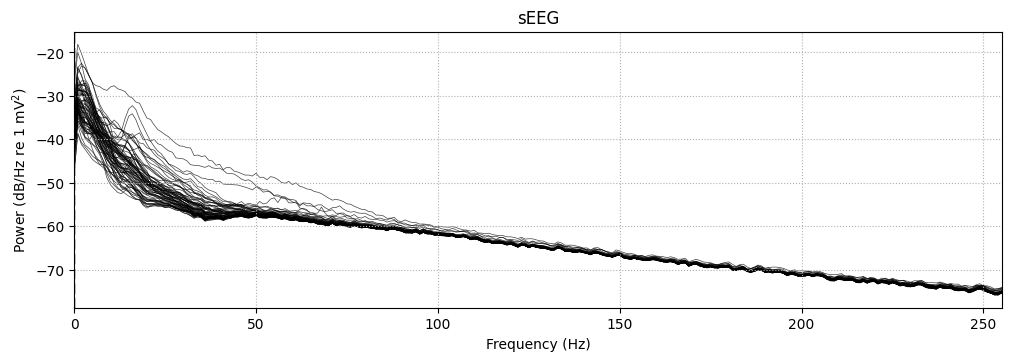

In [208]:
raw.compute_psd(fmax=255).plot()

Variation in PSD is significantly reduced. However peaks are visible at 50 HZ, 100 HZ, 150 Hz, 200 Hz, 250 Hz due to line noise. We need to calculate 

In [209]:
raw.notch_filter(freqs=np.arange(50, 251, 50), method='fir', fir_window='blackman')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Blackman window with 0.0017 passband ripple and 74 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 20481 samples (10.000 s)



<RawBrainVision | sub-09_ses-iemu_task-film_acq-clinical_run-2_ieeg.eeg, 69 x 856883 (418.4 s), ~451.1 MiB, data loaded>

Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_37153/1878111500.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=255).plot()
/home/inesh_roy/Cogsci_Task/myenv/lib/python3.12/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


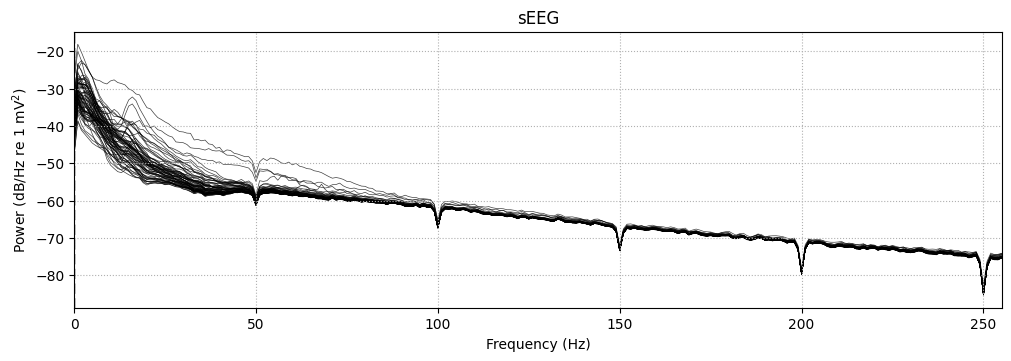

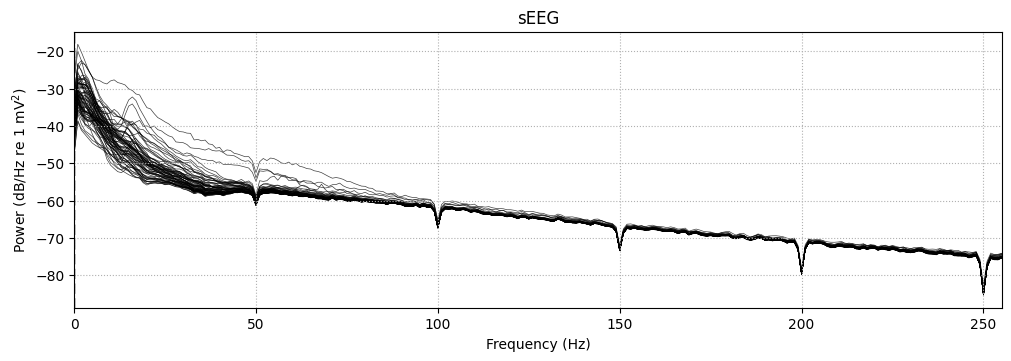

In [210]:
raw.compute_psd(fmax=255).plot()

The line noise has been successfully removed from the channels.

We realize that the channels still have some noise present in all the channels other than line noise. This can be removed by using Common Average Referencing (CAR)

In [211]:
raw_car, _ = mne.set_eeg_reference(raw.copy(), 'average')

sEEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('sEEG',) reference.


Computing the PSD after calculating the CAR of all channels

Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_37153/3837278048.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_car.compute_psd(fmax=255).plot()
/home/inesh_roy/Cogsci_Task/myenv/lib/python3.12/site-packages/mne/viz/utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


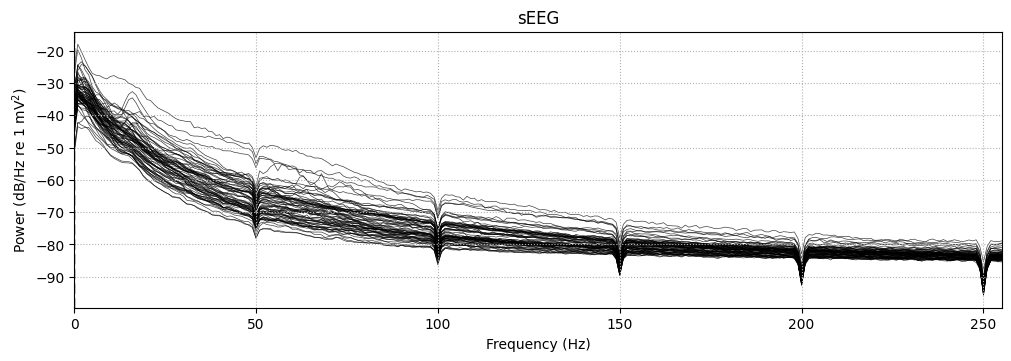

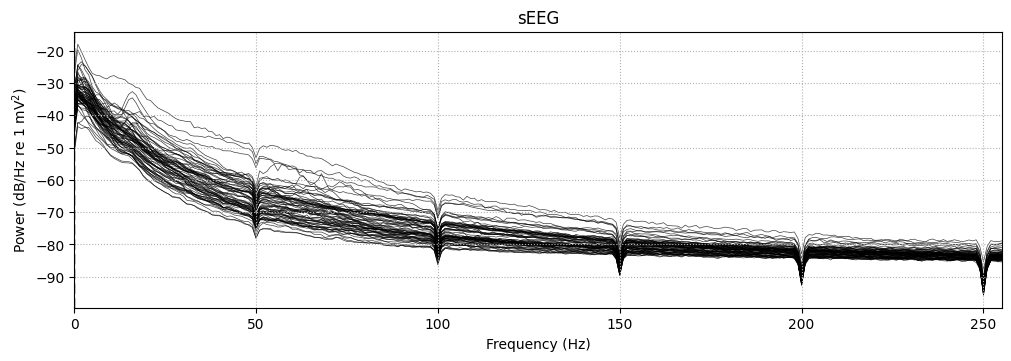

In [212]:
raw_car.compute_psd(fmax=255).plot()

Confirming the effect CAR has on our data by calculating the average of all channels before and after CAR. The average before CAR represents the noise present common to all channels, The constant 0 average after CAR denotes complete removal of this common noise.

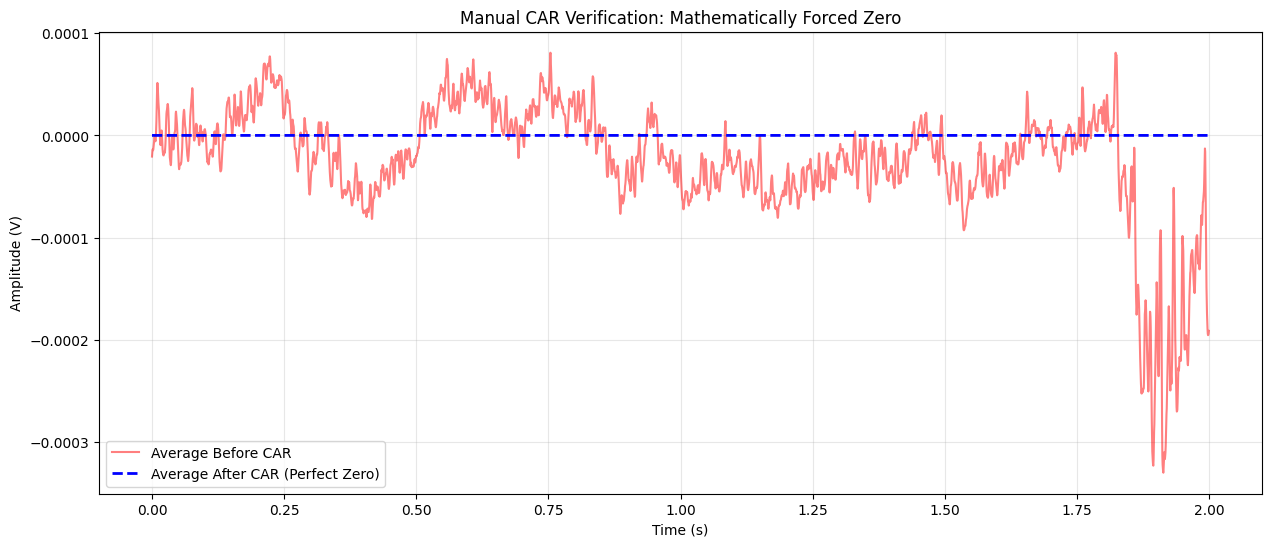

Residual Average: 1.99e-22


In [213]:


# 1. Identify Brain Channels (matching your TSV groupings T, sT, vT)
# We exclude MISC, TRIG, and ECG because they weren't part of the CAR
brain_picks = mne.pick_types(raw.info, ecog=True, seeg=True, eeg=True, exclude='bads')

# 2. Extract the raw data for the time window
t_start, t_stop = 0, 2
start_idx, stop_idx = raw.time_as_index([t_start, t_stop])
times = raw.times[start_idx:stop_idx]
data = raw.get_data(picks=brain_picks, start=start_idx, stop=stop_idx)

# 3. Perform the Manual CAR Calculation
# Calculate the mean across channels at every time point
global_mean = np.mean(data, axis=0)

# Subtract that mean from every channel
data_car = data - global_mean

# 4. Verification: Calculate the new average
# This MUST be zero because we just subtracted the mean
avg_before = global_mean
avg_after = np.mean(data_car, axis=0)

# 5. Plotting
plt.figure(figsize=(15, 6))
plt.plot(times, avg_before, label='Average Before CAR', color='red', alpha=0.5)
plt.plot(times, avg_after, label='Average After CAR (Perfect Zero)', color='blue', linestyle='--', linewidth=2)

plt.title("Manual CAR Verification: Mathematically Forced Zero")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Residual Average: {np.mean(avg_after):.2e}")

Now that we are done with removal of noise, we also need to bring the channel data to a base frequency by resampling. The reason behind this is when we analyze data from different subjects, not all are done with the same sampling frequency, this causes some channels to be of much higher resolution than the other which causes issue during analysis. Hence we are resampling to the lowest frequency used to record in this setting i.e. 512 Hz

In [214]:

raw_resampled = raw_car.copy().resample(sfreq=512)

gamma_resampled = raw_resampled.get_data().T

Plotting the Resampled wave and comparing it to the original wave to confirm if a huge amount of the data or frequency characteristics was lost by sampling.

As we can see that the two plots almost overlap hence very minor loss of characteristics has occured which is manageable 

We finally plot the preprocessed channels.

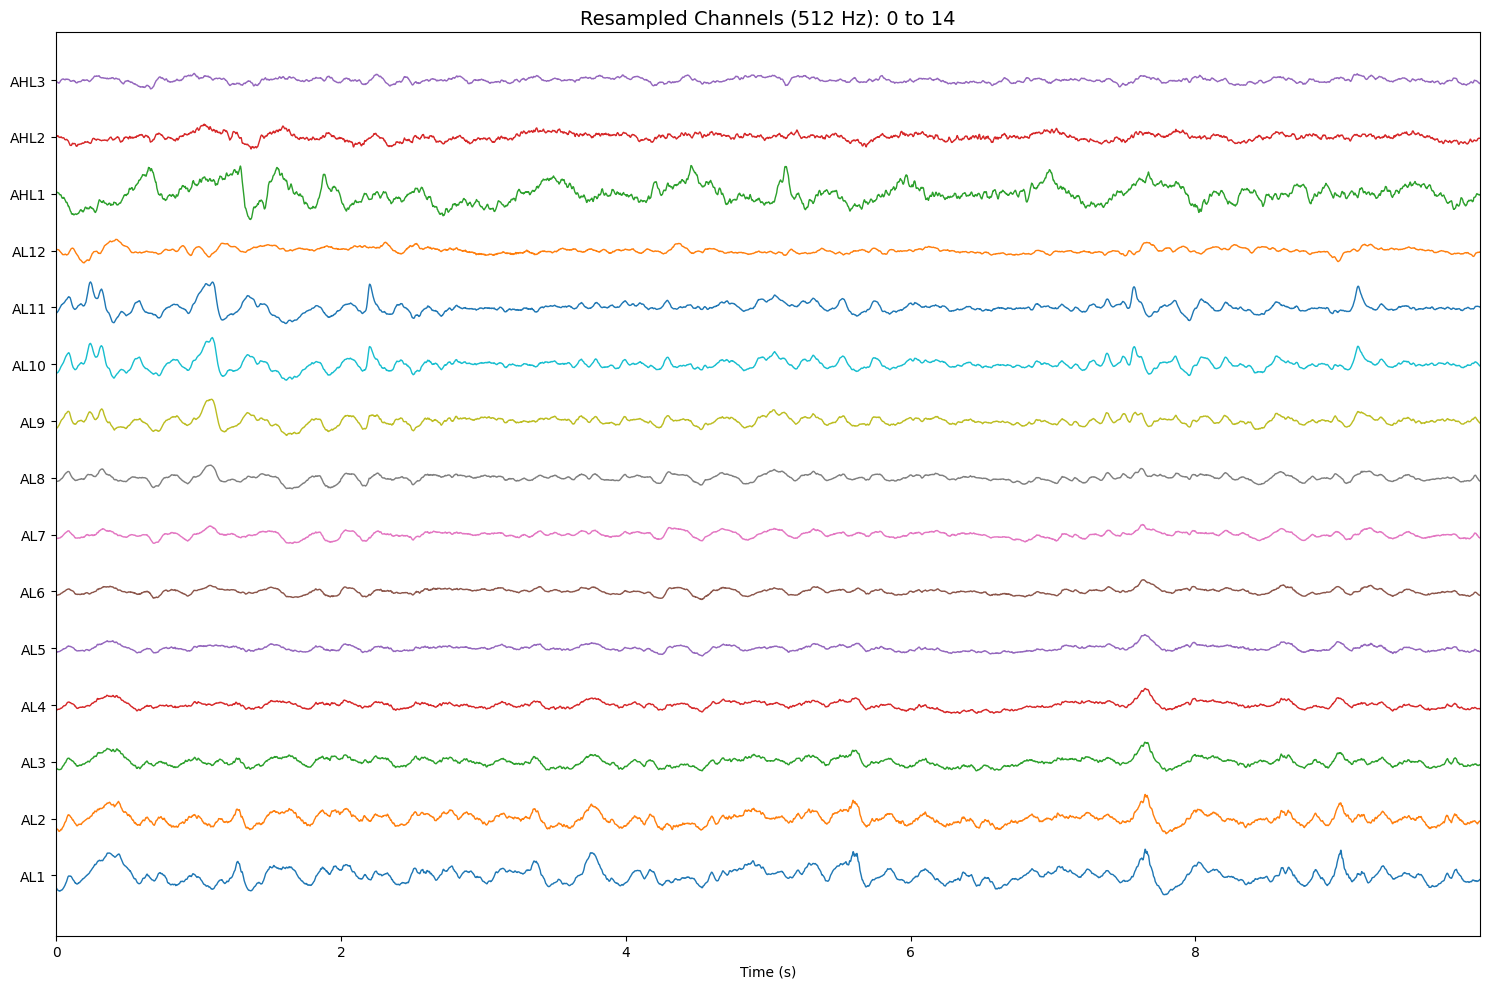

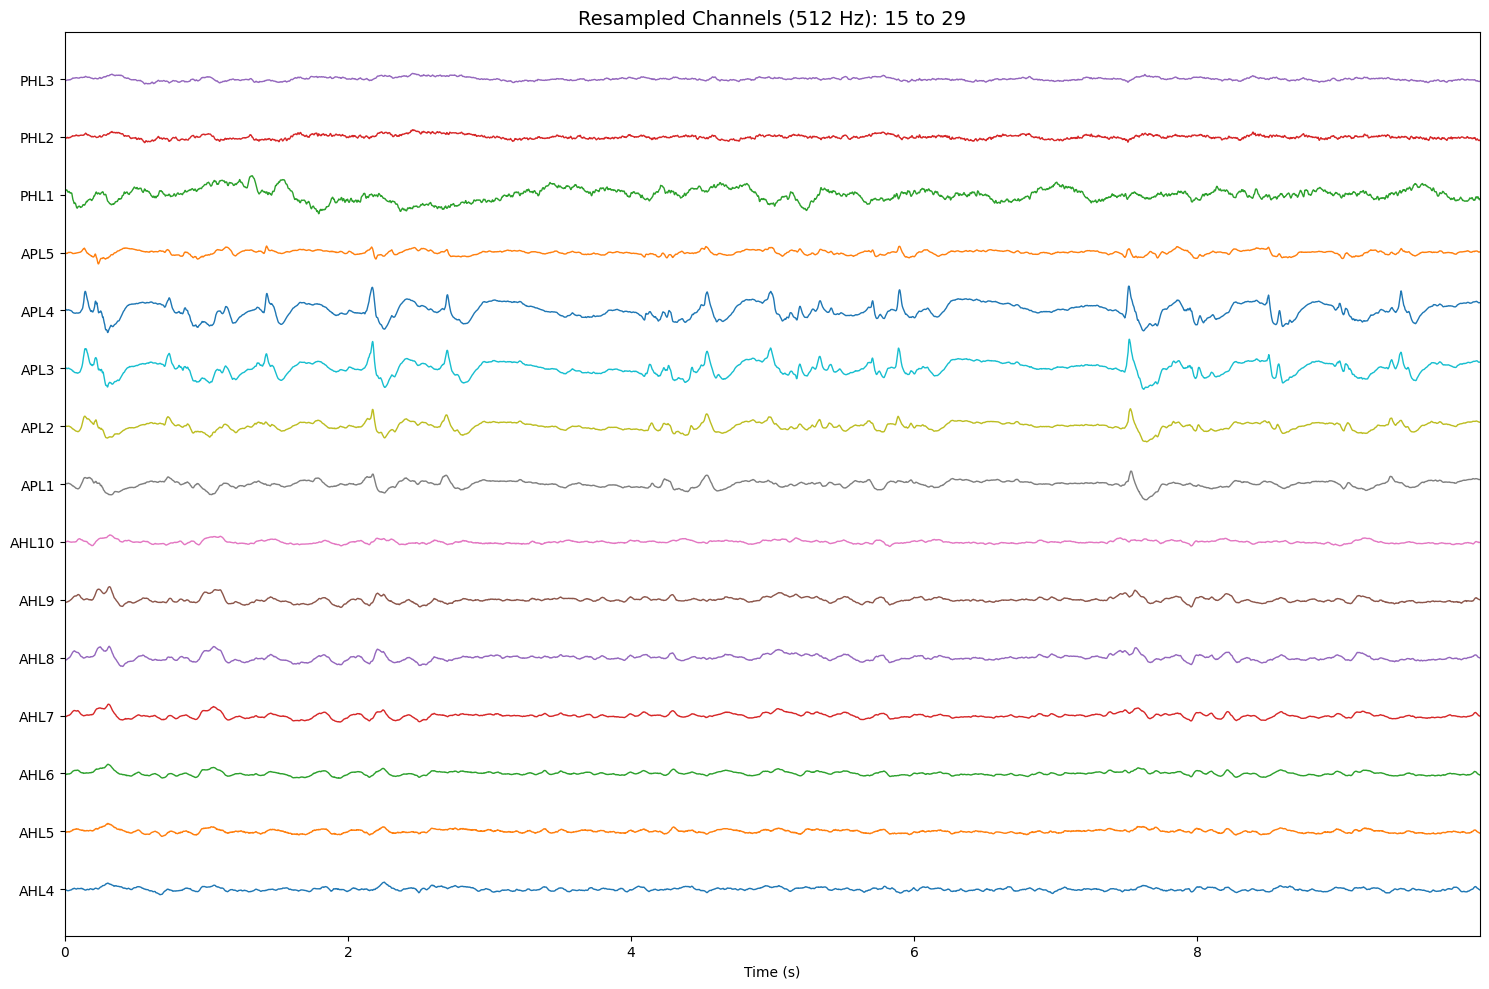

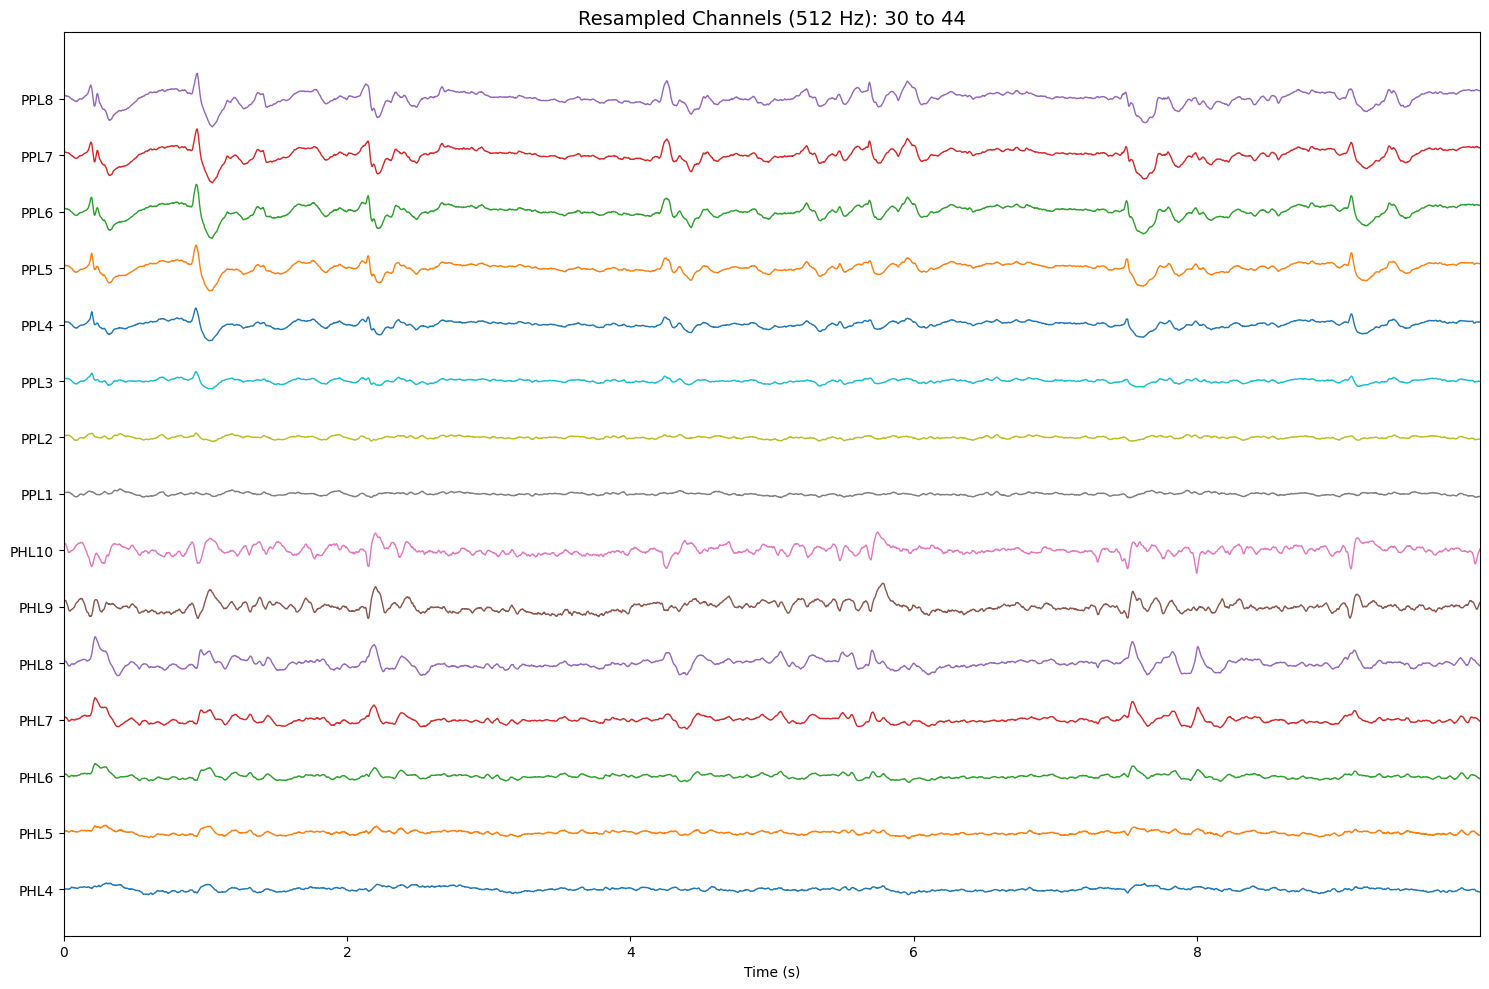

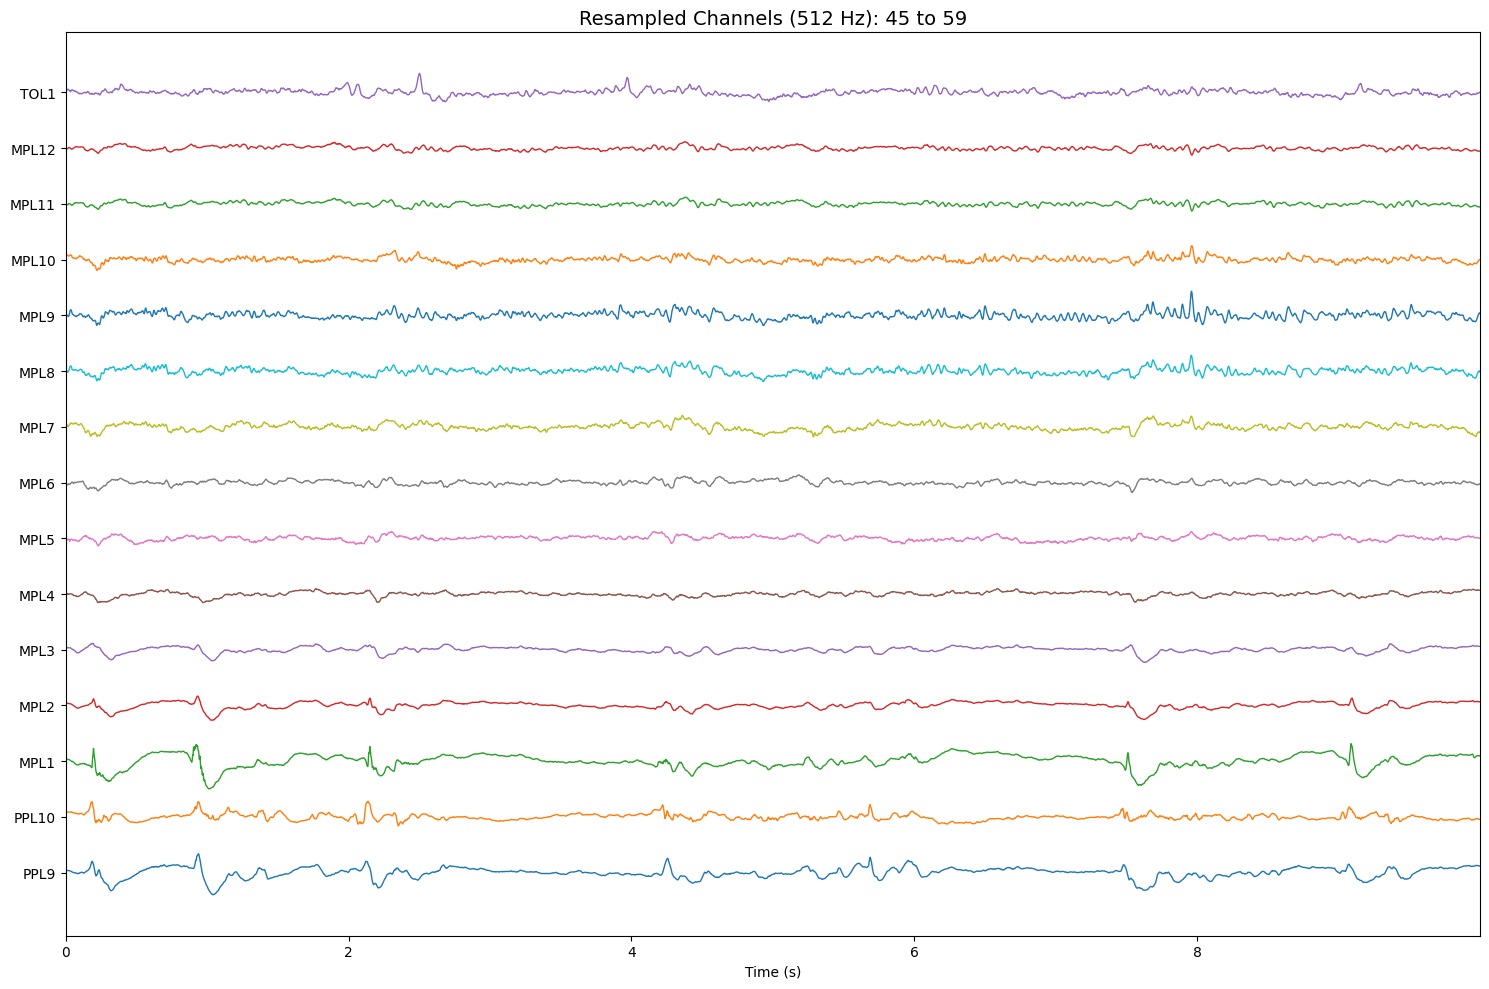

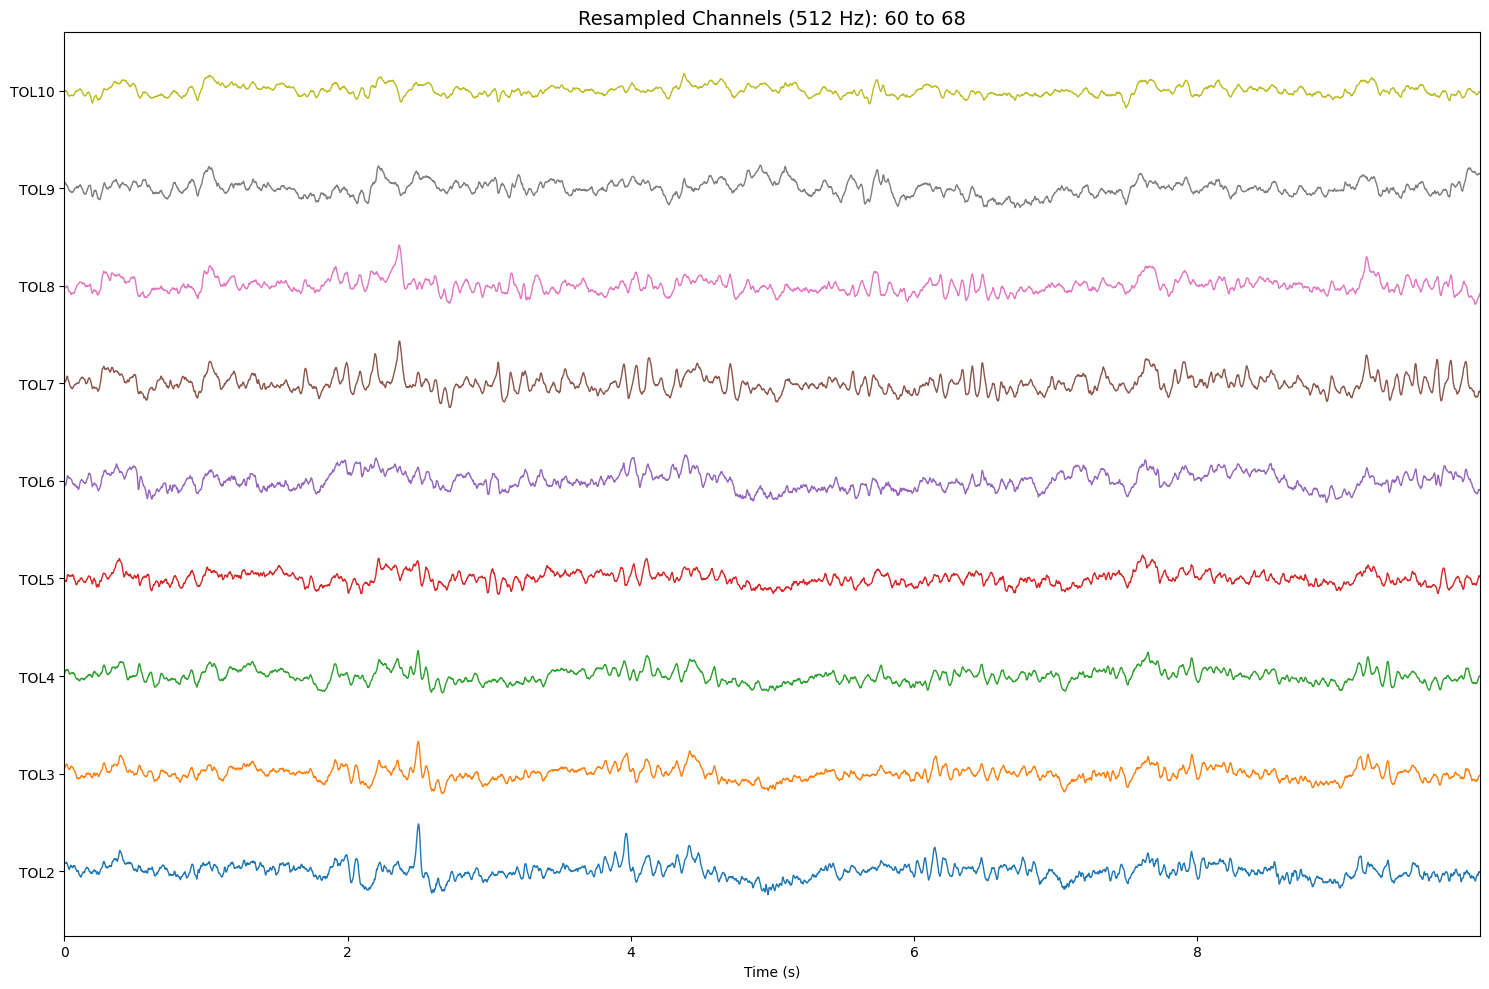

In [215]:


# 1. Configuration
# Assuming 'raw_resampled' is your MNE object at 512 Hz
sfreq = raw_resampled.info['sfreq']
n_channels = len(raw_resampled.ch_names)
batch_size = 15  # Plot 15 channels at a time for clarity
duration = 10    # Plot 10 seconds of data
start_time = 0   # Start from the beginning of the cropped task

# Calculate indices
start_idx = int(start_time * sfreq)
stop_idx = int((start_time + duration) * sfreq)
times = raw_resampled.times[start_idx:stop_idx]

# 2. Plotting Loop
for start_ch in range(0, n_channels, batch_size):
    stop_ch = min(start_ch + batch_size, n_channels)
    current_batch_size = stop_ch - start_ch
    
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Extract data for this batch (channels, samples)
    data = raw_resampled.get_data(picks=range(start_ch, stop_ch), 
                                  start=start_idx, stop=stop_idx)
    
    # Apply a vertical offset so channels don't overlap
    # 5e-4 is usually a good starting scale for iEEG/sEEG
    offset = np.max(np.abs(data)) * 2 
    
    for i in range(current_batch_size):
        # Center each channel and add the offset
        ch_data = data[i, :] - np.mean(data[i, :])
        ax.plot(times, ch_data + (i * offset), linewidth=1)
        
    ax.set_yticks([i * offset for i in range(current_batch_size)])
    ax.set_yticklabels(raw_resampled.ch_names[start_ch:stop_ch])
    ax.set_title(f"Resampled Channels (512 Hz): {start_ch} to {stop_ch-1}", fontsize=14)
    ax.set_xlabel("Time (s)")
    ax.set_xlim(times[0], times[-1])
    
    plt.tight_layout()
    plt.show()

In [216]:
import datetime

# 1. Reset the measurement date to 'None' or a valid modern date
# Setting it to None is the easiest way to bypass the range error
raw_resampled.set_meas_date(None)

# OR set it to a specific modern date if you prefer:
# my_date = datetime.datetime(2026, 1, 1, tzinfo=datetime.timezone.utc)
# raw_resampled.set_meas_date(my_date)

# 2. Now try saving again
# Ensure the folder 'processed_data' exists first
import os
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')

raw_resampled.save('processed_data/sub09_preprocessed-raw.fif', overwrite=True)
print("Successfully saved after fixing meas_date error!")

Writing /home/inesh_roy/Cogsci_Task/processed_data/sub09_preprocessed-raw.fif


Closing /home/inesh_roy/Cogsci_Task/processed_data/sub09_preprocessed-raw.fif
[done]
Successfully saved after fixing meas_date error!
